In [68]:
from datetime import timedelta
from dateutil.relativedelta import relativedelta

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Load Data

In [30]:
raw_cpi_2003 = pd.read_csv('monthly_inflation_2003.csv', 
                      delimiter='|',
                      skiprows=1,
                      header=1,
                      )
raw_cpi_2003.head(2)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,01-Ocak,02-Şubat,03-Mart,04-Nisan,05-Mayıs,06-Haziran,07-Temmuz,08-Ağustos,09-Eylül,10-Ekim,11-Kasım,12-Aralık,Unnamed: 15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tüketici Fiyat Endeksi (2003=100) Aylık Değişi...,Ölçüm bazında,2005.0,0.55,0.02,0.26,0.71,0.92,0.1,-0.57,0.85,1.02,1.79,1.4,0.42,NaN


In [31]:
raw_cpi_1997 = pd.read_csv('monthly_inflation_1997.csv', 
                      delimiter='|',
                      skiprows=1,
                      header=1,
                      )
raw_cpi_1997.head(2)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,01-Ocak,02-Şubat,03-Mart,04-Nisan,05-Mayıs,06-Haziran,07-Temmuz,08-Ağustos,09-Eylül,10-Ekim,11-Kasım,12-Aralık,Unnamed: 15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tüketici Fiyatları Endeksi (1994=100) Aylık De...,Ölçüm bazında,2002.0,5.3,1.8,1.2,2.1,0.6,0.6,1.4,2.2,3.5,3.3,2.9,1.6,NaN


In [32]:
raw_interest = pd.read_csv('central_bank_interest_rates.csv', encoding='iso-8859-9')
raw_interest

,Tarih,Borç Alma,Borç Verme
0,20.02.02,57.0,62.0
1,14.03.02,54.0,61.0
2,08.04.02,51.0,58.0
3,30.04.02,48.0,55.0
4,05.08.02,46.0,53.0
...,...,...,...
108,21.10.22,9.0,12.0
109,25.11.22,7.5,10.5
110,24.02.23,7.0,10.0
111,23.06.23,13.5,16.5


## Format Data


In [37]:
cpi_2003 = raw_cpi_2003.copy()
cpi_2003.rename(columns={'Unnamed: 2': 'Year'}, inplace=True)
cpi_2003.drop(columns=[f'Unnamed: {x}' for x in [0, 1, 15]], inplace=True)
cpi_2003.dropna(inplace=True)
cpi_2003.head(3)

,Year,01-Ocak,02-Şubat,03-Mart,04-Nisan,05-Mayıs,06-Haziran,07-Temmuz,08-Ağustos,09-Eylül,10-Ekim,11-Kasım,12-Aralık
1,2005.0,0.55,0.02,0.26,0.71,0.92,0.10,-0.57,0.85,1.02,1.79,1.40,0.42
2,2006.0,0.75,0.22,0.27,1.34,1.88,0.34,0.85,-0.44,1.29,1.27,1.29,0.23
3,2007.0,1.00,0.43,0.92,1.21,0.50,-0.24,-0.73,0.02,1.03,1.81,1.95,0.22


In [38]:
cpi_1997 = raw_cpi_1997.copy()
cpi_1997.rename(columns={'Unnamed: 2': 'Year'}, inplace=True)
cpi_1997.drop(columns=[f'Unnamed: {x}' for x in [0, 1, 15]], inplace=True)
cpi_1997.dropna(inplace=True)
cpi_1997

,Year,01-Ocak,02-Şubat,03-Mart,04-Nisan,05-Mayıs,06-Haziran,07-Temmuz,08-Ağustos,09-Eylül,10-Ekim,11-Kasım,12-Aralık
1,2002.0,5.3,1.8,1.2,2.1,0.6,0.6,1.4,2.2,3.5,3.3,2.9,1.6
2,2003.0,2.6,2.3,3.1,2.1,1.6,-0.2,-0.4,0.2,1.9,1.4,1.6,0.9
3,2004.0,0.7,0.6,0.9,0.6,0.4,-0.1,0.2,0.6,0.9,2.2,1.5,0.4


In [39]:
cpi = pd.concat([cpi_1997, cpi_2003])
cpi.head(5)

,Year,01-Ocak,02-Şubat,03-Mart,04-Nisan,05-Mayıs,06-Haziran,07-Temmuz,08-Ağustos,09-Eylül,10-Ekim,11-Kasım,12-Aralık
1,2002.0,5.30,1.80,1.20,2.10,0.60,0.60,1.40,2.20,3.50,3.30,2.90,1.60
2,2003.0,2.60,2.30,3.10,2.10,1.60,-0.20,-0.40,0.20,1.90,1.40,1.60,0.90
3,2004.0,0.70,0.60,0.90,0.60,0.40,-0.10,0.20,0.60,0.90,2.20,1.50,0.40
1,2005.0,0.55,0.02,0.26,0.71,0.92,0.10,-0.57,0.85,1.02,1.79,1.40,0.42
2,2006.0,0.75,0.22,0.27,1.34,1.88,0.34,0.85,-0.44,1.29,1.27,1.29,0.23


In [41]:
cpi['Year'] = cpi['Year'].astype('int')
cpi = cpi.melt(id_vars='Year')
cpi['Month'] = cpi['variable'].str[:2]
cpi.sort_values(['Year', 'Month'], inplace=True)
cpi.rename(columns={'value': 'CPI'}, inplace=True)
del cpi['variable']
cpi['Date'] = pd.to_datetime(cpi['Year'].astype('str').str.cat(cpi['Month'], sep='-'), format='%Y-%m')
cpi['Date'] = cpi['Date'].apply(lambda x: x + relativedelta(months=1)) - timedelta(days=1)
del cpi['Year']
del cpi['Month']
cpi.set_index('Date', inplace=True)
cpi

,CPI
Date,
2002-01-31,5.30
2002-02-28,1.80
2002-03-31,1.20
2002-04-30,2.10
2002-05-31,0.60
...,...
2022-08-31,1.46
2022-09-30,3.08
2022-10-31,3.54


In [42]:
interest_rates = raw_interest.copy()
interest_rates['date'] = pd.to_datetime(interest_rates['Tarih'], format='%d.%m.%y')
del interest_rates['Tarih']
daily_index = pd.date_range(interest_rates['date'].min(), interest_rates['date'].max(), freq='D')
monthly_index = pd.date_range(interest_rates['date'].min(), interest_rates['date'].max(), freq='M')
interest_rates.set_index('date', inplace=True)
interest_rates = interest_rates.reindex(index=daily_index)
interest_rates.ffill(inplace=True)
interest_rates = interest_rates.reindex(index=monthly_index)
interest_rates.rename(columns={'Borç Alma': 'Borrowing', 'Borç Verme': 'Lending'}, inplace=True)
interest_rates

,Borrowing,Lending
2002-02-28,57.0,62.0
2002-03-31,54.0,61.0
2002-04-30,48.0,55.0
2002-05-31,48.0,55.0
2002-06-30,48.0,55.0
...,...,...
2023-02-28,7.0,10.0
2023-03-31,7.0,10.0
2023-04-30,7.0,10.0
2023-05-31,7.0,10.0


In [45]:
interet_rate_and_cpi = pd.concat([interest_rates, cpi], axis=1)
interet_rate_and_cpi.dropna(subset=['CPI'], inplace=True)
interet_rate_and_cpi.index.rename('Date', inplace=True)
interet_rate_and_cpi.reset_index(inplace=True)
interet_rate_and_cpi


,Date,Borrowing,Lending,CPI
0,2002-01-31,NaN,NaN,5.30
1,2002-02-28,57.0,62.0,1.80
2,2002-03-31,54.0,61.0,1.20
3,2002-04-30,48.0,55.0,2.10
4,2002-05-31,48.0,55.0,0.60
...,...,...,...,...
247,2022-08-31,11.5,14.5,1.46
248,2022-09-30,10.5,13.5,3.08
249,2022-10-31,9.0,12.0,3.54
250,2022-11-30,7.5,10.5,2.88


In [46]:
interet_rate_and_cpi.melt(id_vars='Date')

,Date,variable,value
0,2002-01-31,Borrowing,NaN
1,2002-02-28,Borrowing,57.00
2,2002-03-31,Borrowing,54.00
3,2002-04-30,Borrowing,48.00
4,2002-05-31,Borrowing,48.00
...,...,...,...
751,2022-08-31,CPI,1.46
752,2022-09-30,CPI,3.08
753,2022-10-31,CPI,3.54
754,2022-11-30,CPI,2.88


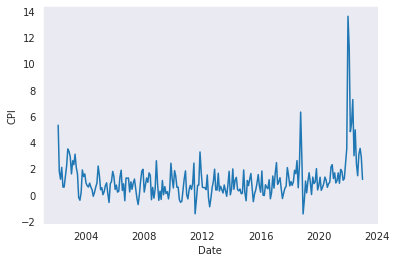

In [47]:
with sns.axes_style("dark"):
    sns.lineplot(data=interet_rate_and_cpi, x='Date', y='CPI')

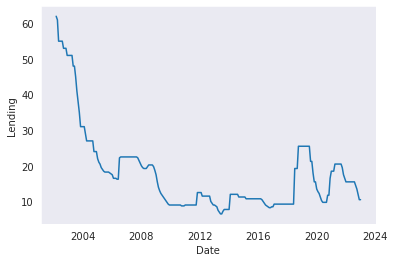

In [48]:
with sns.axes_style("dark"):
    sns.lineplot(data=interet_rate_and_cpi, x='Date', y='Lending')

In [151]:
interet_rate_and_cpi.query('Date.between("2018-01-31","2020-10-31")')

,Date,Borrowing,Lending,CPI
192,2018-01-31,7.25,9.25,1.02
193,2018-02-28,7.25,9.25,0.73
194,2018-03-31,7.25,9.25,0.99
195,2018-04-30,7.25,9.25,1.87
196,2018-05-31,7.25,9.25,1.62
197,2018-06-30,16.25,19.25,2.61
198,2018-07-31,16.25,19.25,0.55
199,2018-08-31,16.25,19.25,2.30
200,2018-09-30,22.50,25.50,6.30
201,2018-10-31,22.50,25.50,2.67


In [155]:
first_time = interet_rate_and_cpi.query('Date.between("2001-10-31","2003-09-30")').copy()
print(len(first_time))
second_time = interet_rate_and_cpi.query('Date.between("2018-07-31","2020-06-30")').copy()
print(len(second_time))
third_time = interet_rate_and_cpi.query('Date.between("2021-10-31","2022-12-31")').copy()
print(len(third_time))
for df in [first_time, second_time, third_time]:
    df['Month'] = ((df['Date'] - df['Date'].min()).dt.days / 30 + 1).round().astype(int) + 1
    df['Start Date'] = df['Date'].min().strftime('%Y-%m')


21
24
15


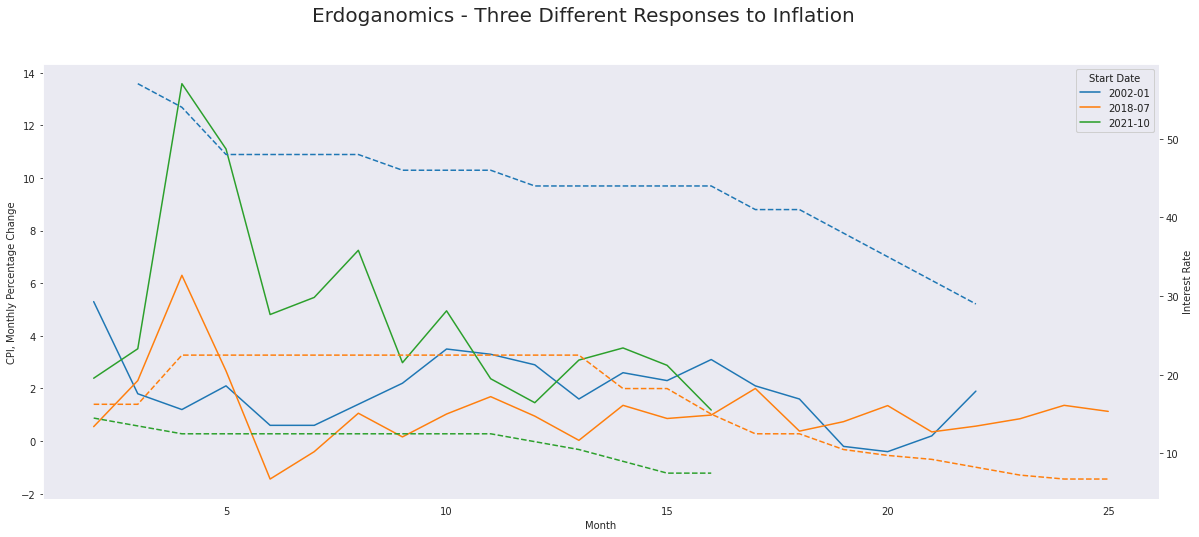

In [156]:
with sns.axes_style("dark"):
    chart_data = pd.concat([first_time, second_time, third_time])
    fig, ax_left = plt.subplots(figsize=(20,8))
    ax_right = ax_left.twinx()
    sns.lineplot(data=chart_data, x='Month', y='CPI', hue='Start Date', ax=ax_left)
    sns.lineplot(data=chart_data, x='Month', y='Borrowing', hue='Start Date', ax=ax_right)
    fig.suptitle('Erdoganomics - Three Different Responses to Inflation', fontsize=20)
    ax_left.set_ylabel('CPI, Monthly Percentage Change')
    ax_right.set_ylabel('Interest Rate')
    for line in ax_right.lines:
        line.set_linestyle('--')

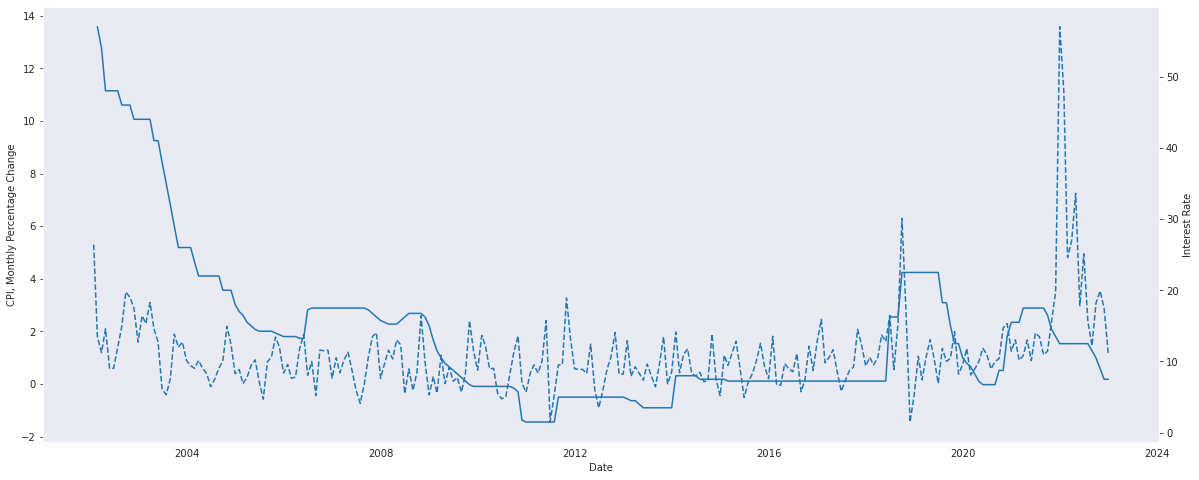

In [157]:
with sns.axes_style("dark"):
    chart_data = interet_rate_and_cpi
    fig, ax_left = plt.subplots(figsize=(20,8))
    ax_right = ax_left.twinx()
    sns.lineplot(data=chart_data, x='Date', y='CPI', ax=ax_left)
    sns.lineplot(data=chart_data, x='Date', y='Borrowing', ax=ax_right)
    ax_left.set_ylabel('CPI, Monthly Percentage Change')
    ax_right.set_ylabel('Interest Rate')
    for line in ax_left.lines:
        # line.set_color('g')
        line.set_linestyle('--')

## Data Sources Used

### Central Bank Interest Rates
https://www.tcmb.gov.tr/wps/wcm/connect/TR/TCMB+TR/Main+Menu/Temel+Faaliyetler/Para+Politikasi/Merkez+Bankasi+Faiz+Oranlari/faiz-oranlari

### Consumer Price Index
https://biruni.tuik.gov.tr/medas/?kn=84&locale=tr